<b>¡Hola Maria!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


# ANÁLISIS PREDICTIVO DE CANCELACIÓN  DE CLIENTES - MODEL FITNESS

Para abordar el análisis predictivo de la cancelación de clientes, se comenzará con un Análisis Exploratorio de Datos (EDA), donde se inspeccionará la calidad, estructura y distribución de las características del conjunto de datos. Seguidamente, en la etapa de Preprocesamiento de Datos, se limpiarán los datos, se manejarán los valores ausentes, se estandarizarán las características numéricas para que tengan una escala similar y se codifican las variables categóricas, garantizando que el modelo pueda interpretarlas de forma adecuada. A continuación, se procederá a la Construcción y Entrenamiento del Modelo, lo que implica seleccionar un algoritmo apropiado, dividir el dataset en conjuntos de entrenamiento y prueba para una validación rigurosa, y finalmente entrenaremos el modelo con los datos preparados. Finalmente, en la fase de Evaluación, Conclusiones y Recomendaciones, se medirá el rendimiento del modelo con la interpretación los resultados para identificar los factores clave que influyen en la cancelación de clientes y se formularán recomendaciones claras y accionables para el negocio.

## ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
ft = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has utilizado correctamente el método <code>info()</code> para obtener una visión general de la estructura del conjunto de datos. Esto es crucial para verificar que no haya valores nulos y para entender la composición de los datos antes de proceder al análisis.
</div>


In [4]:
ft.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
ft.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-block alert-warning">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
El uso de <code>describe()</code> proporciona estadísticas descriptivas útiles. Para obtener una comprensión más completa, sería beneficioso explorar la distribución de las variables categóricas usando <code>value_counts()</code>. Esto te ayudará a identificar desequilibrios en los datos categóricos.
</div>


Iniciamos con la preparación del entorno, instalando las **librerías** necesarias y **cargando el archivo** de datos del gimnasio. Para familiarizarnos con el dataset, realizamos un **Análisis Exploratorio de Datos (EDA)** que comenzó con el método **info()** para verificar los tipos de datos y la presencia de valores ausentes, seguido de **head()** para visualizar las primeras filas y entender la estructura de las características, notando que varias variables categóricas ya estaban codificadas de forma **binaria**. Finalmente, con **describe()**, observamos las estadísticas descriptivas; destacando que en la columna **'Churn'**, la media de 0.26 y la desviación estándar de 0.44 indican que la tasa de cancelación es del 26% y que la mayoría de los clientes son leales, aunque esta información preliminar subraya la necesidad de construir un modelo predictivo para abordar y mitigar la cancelación futura.

In [6]:
ft_agrupado_churn = ft.groupby('Churn').mean()
ft_agrupado_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Agrupar los datos por la variable <code>Churn</code> y calcular los promedios es un enfoque efectivo para resaltar las diferencias en las características entre los clientes que cancelan y los que no. Esto puede proporcionar insights valiosos sobre los factores que contribuyen a la cancelación.
</div>


In [7]:
clientes_cancelados = ft[ft['Churn']== 1]
clientes_leales = ft[ft['Churn']!= 1]

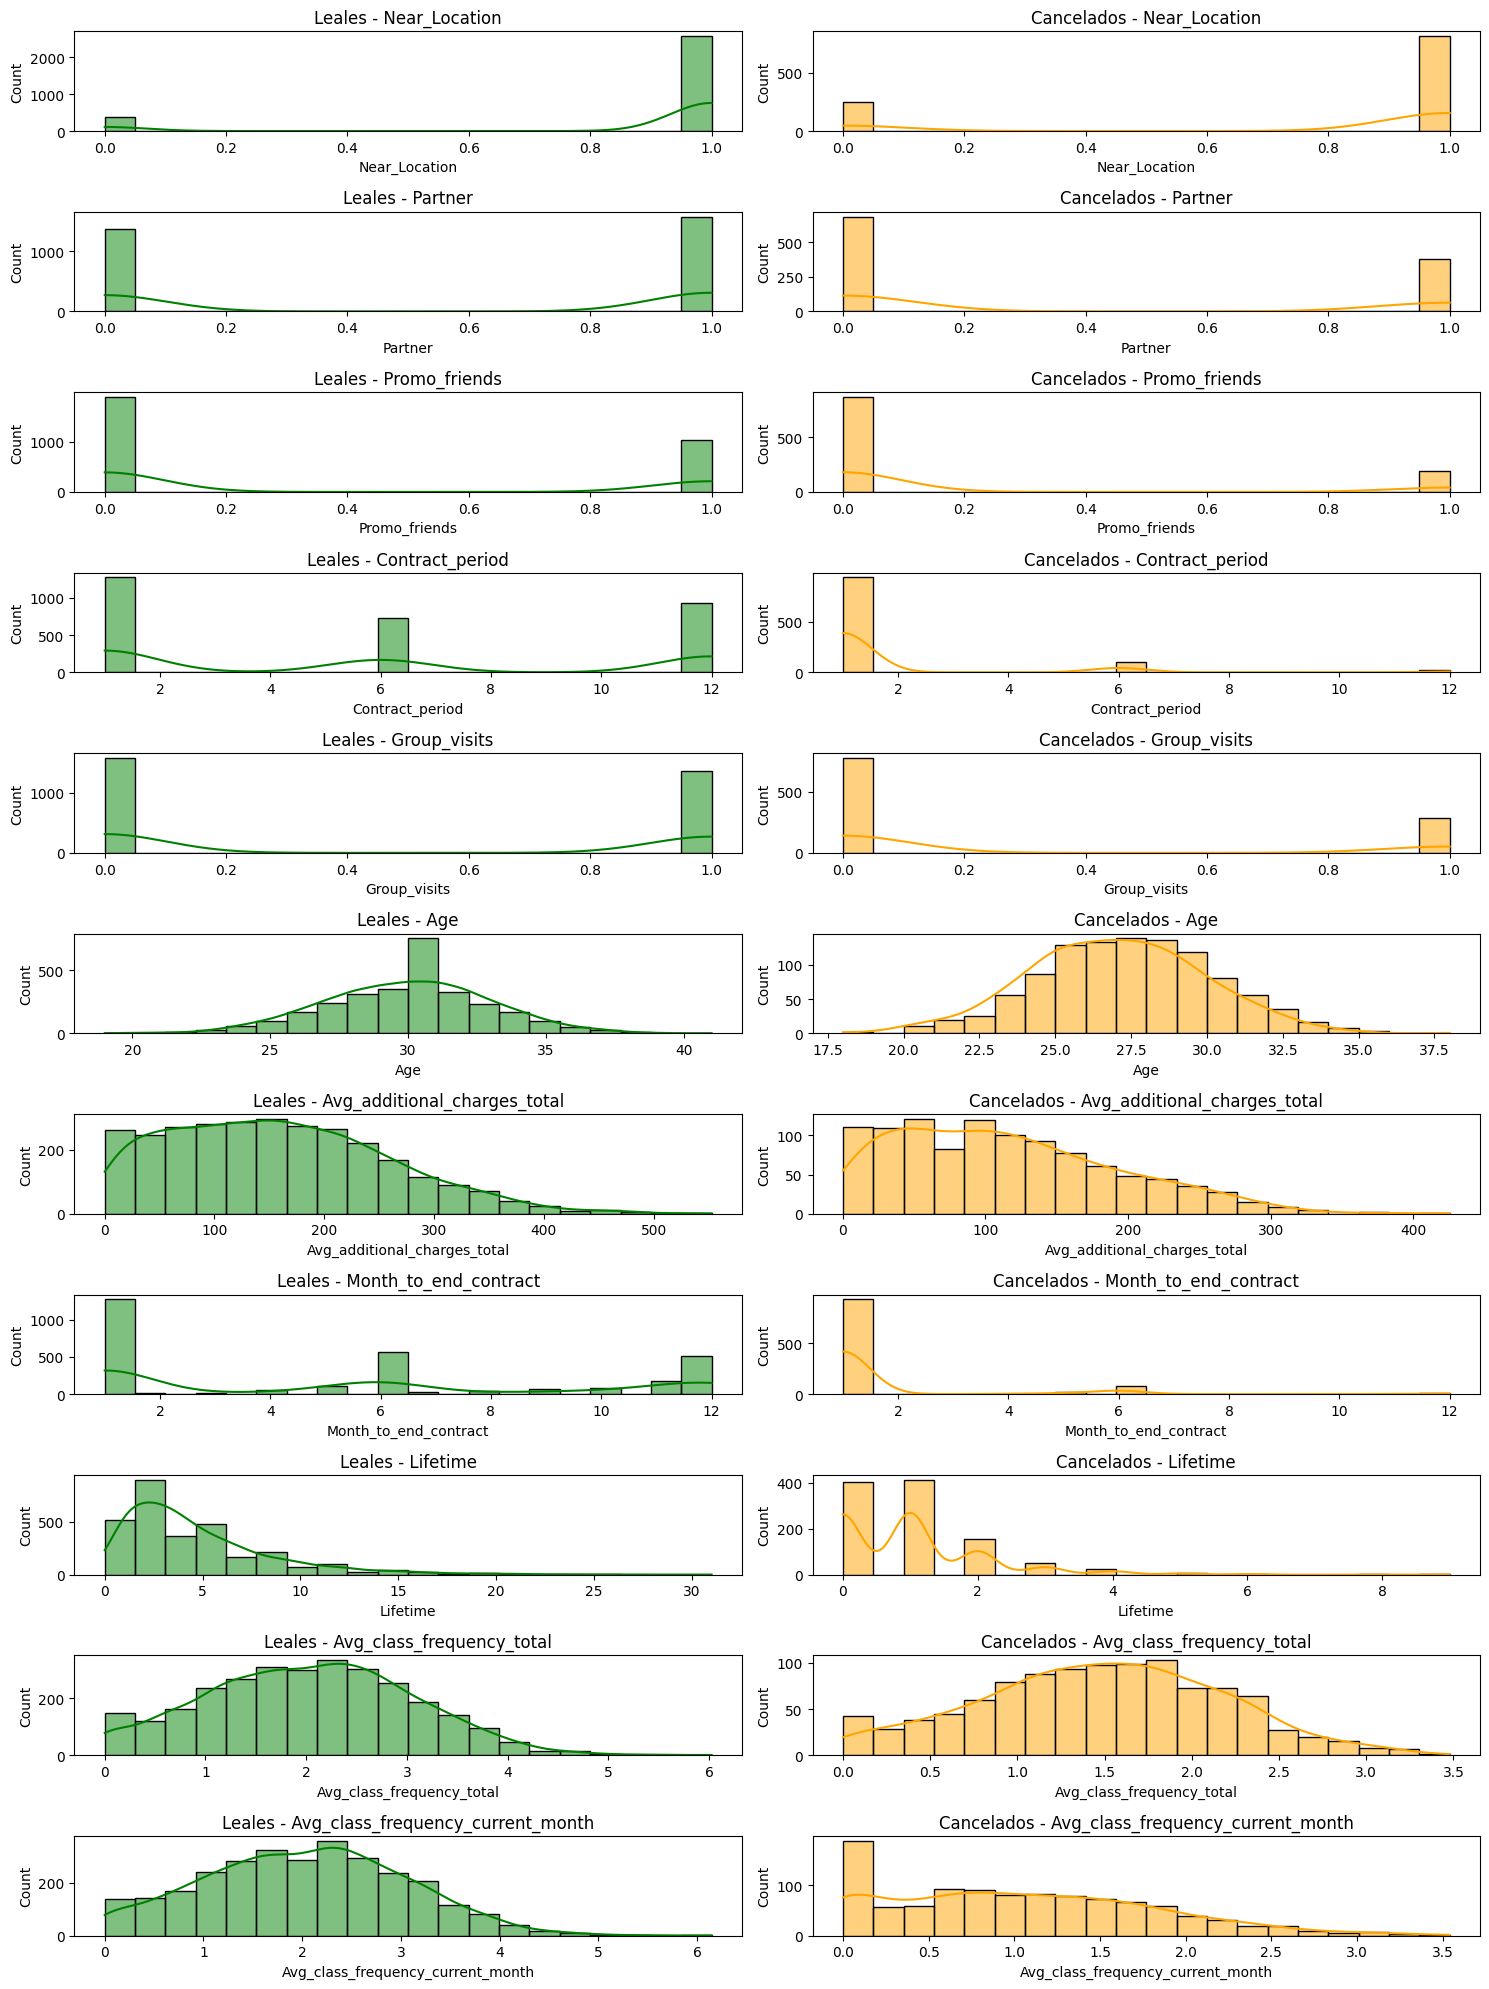

In [8]:

numeric_cols = [
    'Near_Location',                       
    'Partner',
    'Promo_friends',
    'Contract_period',
    'Group_visits',
    'Age',
    'Avg_additional_charges_total',
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month']
plt.figure(figsize=(15, 20))
for i in range(len(numeric_cols)):
    col = numeric_cols[i]
    
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)

    sns.histplot(x=clientes_leales[col], kde=True, bins=20, color='green')
    plt.title(f'Leales - {col}')


    plt.subplot(len(numeric_cols), 2, 2 * i + 2)
    
    sns.histplot(x=clientes_cancelados[col], kde=True, bins=20, color='orange')
    plt.title(f'Cancelados - {col}')

plt.tight_layout()
plt.show()

                                                

<div class="alert alert-block alert-warning">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
La visualización de las distribuciones de las variables es muy útil para comparar clientes leales y cancelados. Asegúrate de interpretar estas visualizaciones para identificar patrones o diferencias significativas que puedan influir en la retención de clientes.
</div>


A partir del análisis de las medias de las características, como la gráfica de histogramas de barras, se obtuvo gran información, agrupando grupos por la columna Churn, con el método **groupby** se identificaron diferencias claves entre los clientes leales y los que cancelaron su membresía. Los datos revelan que los clientes que cancelan tienen una media significativamente menor en la cercanía al gimnasio **Near_Location**, lo que sugiere que la distancia es un factor relevante. Además, se observa que los clientes leales se benefician más de las alianzas **Partner** y de las promociones por referidos **Promo_friends**. En cuanto a los hábitos de los clientes, los que cancelan tienen una duración de contrato **Contract_period** y un tiempo de vida como miembros **Lifetime** considerablemente más cortos, y participan menos en clases grupales **Group_visits**. Un indicador notable es que los clientes que cancelan tienen una frecuencia media de visitas semanal muy baja **Avg_class_frequency_total** y tienden a cancelar aproximadamente 1.7 meses antes de la finalización de su contrato **Month_to_end_contract**, lo que refuerza la idea de una baja lealtad y compromiso.

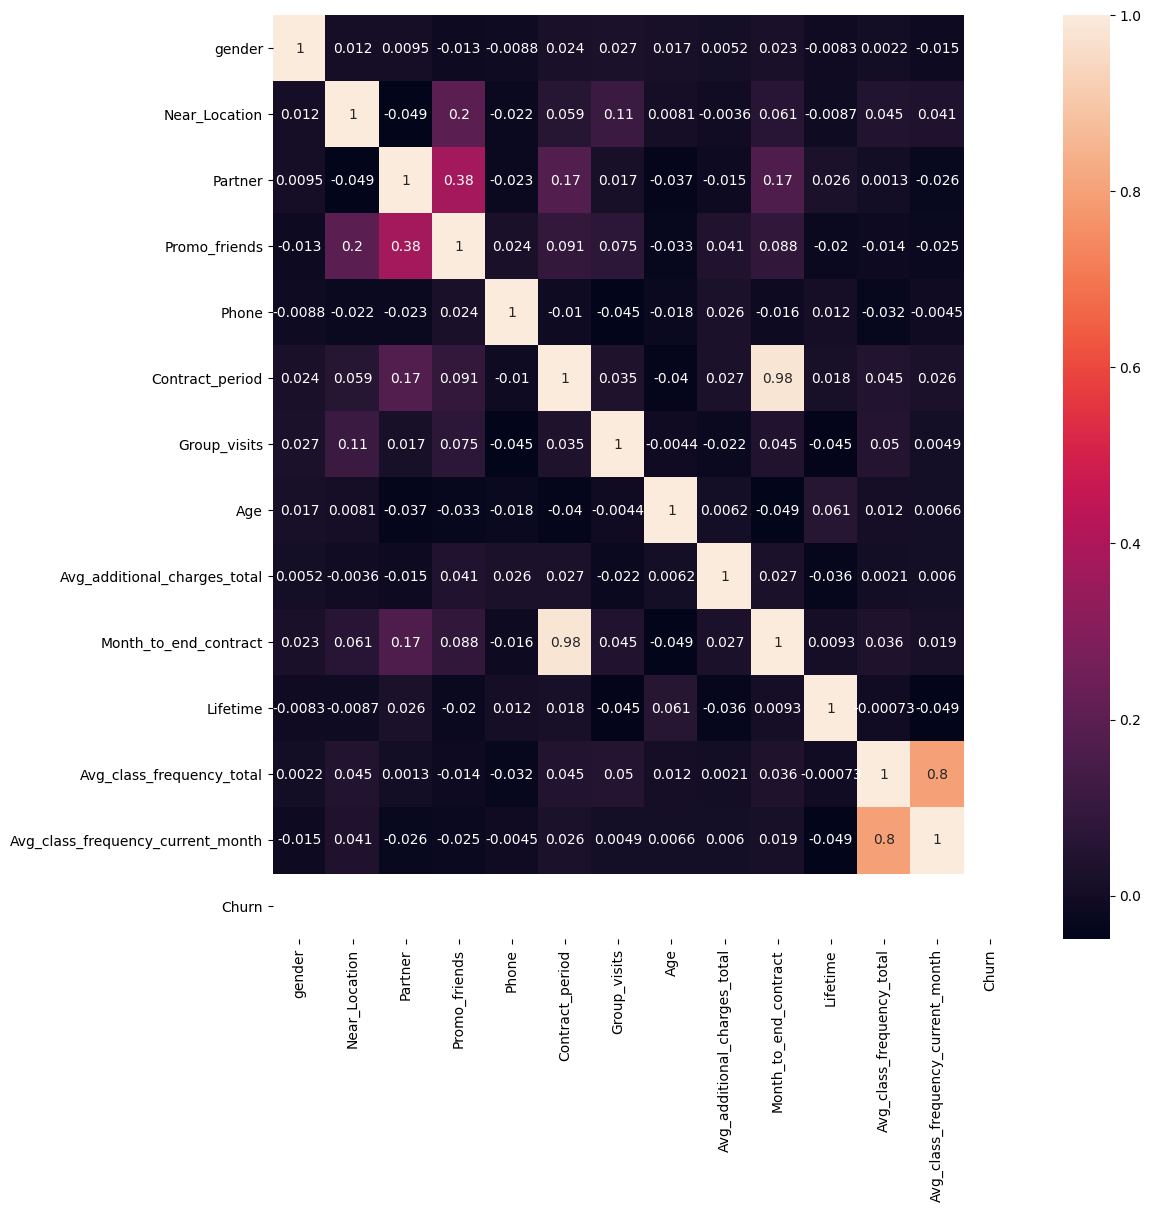

In [9]:

cm = clientes_cancelados.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot=True, ax=ax)
ax.set_ylim(len(cm), 0) 
plt.show()


<div class="alert alert-block alert-success">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
El mapa de calor es una excelente herramienta para visualizar la matriz de correlación y detectar relaciones entre variables. Ajustar los límites del eje y mejora la claridad de la visualización, facilitando la interpretación de las correlaciones.
</div>


El análisis de la matriz de correlación, obtenida mediante el método **.corr()** y visualizada como un mapa de calor, reveló relaciones significativas entre varias características del conjunto de datos. Se observa una fuerte correlación positiva entre **Month_to_end_contract** y **Contract_period**, lo cual es un hallazgo esperado, ya que los contratos de mayor duración naturalmente tienen más meses restantes para expirar. De manera similar, se identificó una alta correlación entre la frecuencia media de visitas a lo largo del tiempo **Avg_class_frequency_total** y la frecuencia media de visitas del mes en curso **Avg_class_frequency_current_month**, lo que indica que los hábitos de asistencia de los clientes son consistentes y estables a lo largo de su membresía.

## MODELO DE PREDICCIÓN

In [10]:
x = ft.drop(columns = ['Churn'])
y = ft['Churn']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### MODELO DE REGRESIÓN LOGSTICA

In [12]:
rl_model = LogisticRegression(random_state=42, max_iter=1000)

In [13]:
rl_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

<div class="alert alert-block alert-warning">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
Al entrenar el modelo de Regresión Logística, es importante verificar la presencia de multicolinealidad en los datos. Esto es especialmente relevante si no se han eliminado columnas dummy redundantes, ya que la multicolinealidad puede afectar la estabilidad de los coeficientes del modelo.
</div>


In [14]:
rl_predictions = rl_model.predict(x_test)

In [15]:
rl_accuracy = accuracy_score(y_test, rl_predictions)
rl_precision = precision_score(y_test, rl_predictions)
rl_recall = recall_score(y_test, rl_predictions)

In [16]:
print("Regresión Logística:")
print(f"  Exactitud: {rl_accuracy:.2f}")
print(f"  Precisión: {rl_precision:.2f}")
print(f"  Exhaustividad: {rl_recall:.2f}")

Regresión Logística:
  Exactitud: 0.92
  Precisión: 0.87
  Exhaustividad: 0.78


<div class="alert alert-block alert-success">
<b>Celda [16]</b> <a class="tocSkip"></a><br>
Las métricas de rendimiento calculadas para la Regresión Logística son precisas y proporcionan una evaluación clara de la eficacia del modelo. Estas métricas son fundamentales para entender cómo el modelo está clasificando los datos.
</div>


### MODELO BOSQUE ALEATORIO

In [17]:
ba_model = RandomForestClassifier(random_state=42)

In [18]:
ba_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
ba_predictions = ba_model.predict(x_test)

In [20]:
ba_accuracy = accuracy_score(y_test, ba_predictions)
ba_precision = precision_score(y_test, ba_predictions)
ba_recall = recall_score(y_test, ba_predictions)

In [21]:
print("Bosque Aleatorio:")
print(f"  Exactitud: {ba_accuracy:.2f}")
print(f"  Precisión: {ba_precision:.2f}")
print(f"  Exhaustividad: {ba_recall:.2f}")

Bosque Aleatorio:
  Exactitud: 0.91
  Precisión: 0.85
  Exhaustividad: 0.78


<div class="alert alert-block alert-warning">
<b>Celda [21]</b> <a class="tocSkip"></a><br>
El modelo de Bosque Aleatorio muestra un buen rendimiento. Realizar una validación cruzada podría proporcionar una evaluación más robusta y confiable de su rendimiento, ayudando a asegurar que el modelo generalice bien a nuevos datos.
</div>


**Exactitud**: La Regresión Logística tiene una ligera ventaja del 92% frente al 91% del Bosque Aleatorio. Esto significa que predice correctamente un poco más a menudo.

**Precisión**: La Regresión Logística supera al Bosque Aleatorio (87% vs. 85%). Esto es importante, ya que indica que es más confiable cuando predice que un cliente va a cancelar, con menos falsos positivos.

**Exhaustividad**: En esta métrica, que mide la capacidad de identificar a todos los clientes que realmente cancelarán, ambos modelos tienen un desempeño idéntico de 78%.

Podemos decir que la Regresión Logística es la mejor opción, ya que presenta una precisión superior y una ligera ventaja en exactitud, sin sacrificar la capacidad de identificar a los clientes en riesgo de cancelación.

## CLÚSTERES DE USUARIOS

In [22]:
x_clustering = ft.drop(columns = ['Churn'])

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_clustering)

<div class="alert alert-block alert-success">
<b>Celda [23]</b> <a class="tocSkip"></a><br>
Escalar los datos antes de realizar el clustering es una decisión acertada. El escalado asegura que las distancias euclidianas usadas en el clustering sean significativas y comparables entre las diferentes características.
</div>


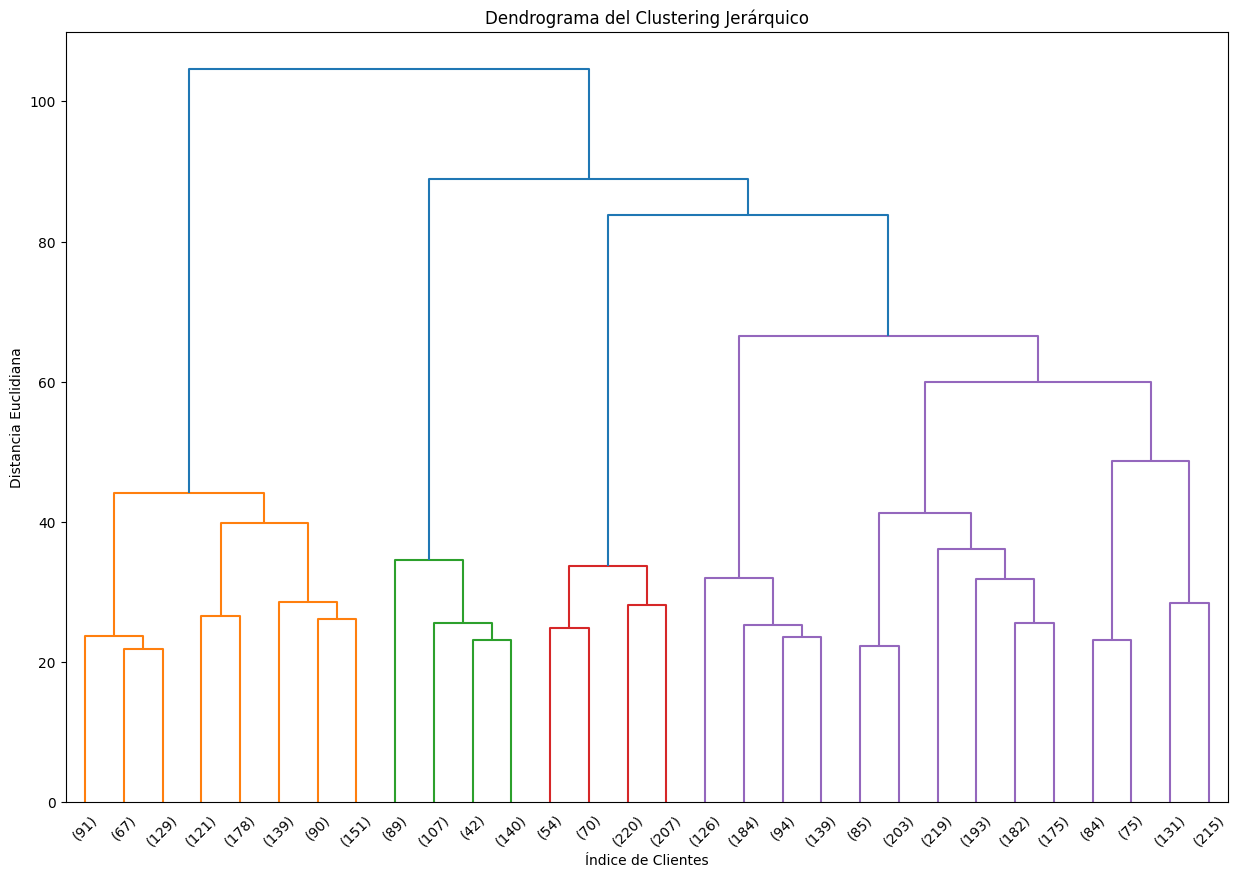

In [24]:
linked = linkage(x_scaled, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', truncate_mode='lastp', p=30)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índice de Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [24]</b> <a class="tocSkip"></a><br>
El dendrograma ofrece una buena visión general del clustering jerárquico. Sería útil explicar cómo determinaste el número de clústeres para el modelo K-Means, ya que esto influye directamente en la interpretación y utilidad del clustering.
</div>


Podemos ver en dendograma que existen **5 clústeres**

In [25]:
km_model = KMeans(n_clusters=5, random_state=42, n_init=10)
km_predictions = km_model.fit_predict(x_scaled)

In [26]:
ft['cluster_km'] = km_predictions

In [27]:
ft.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


**Clientes con baja asistencia y sin teléfono**: Se realizó un clúster que incluye a clientes sin teléfono, siendo el clúster más marcado. Otro clúster de clientes que han asistido al gimnasio un máximo de una vez por semana durante el último mes. Además, esta baja frecuencia de visita se mantiene de forma consistente a lo largo del tiempo. Este segmento también se caracteriza por el tiempo que llevan con el contrato.

**Clientes antiguos**: Un segundo grupo de clientes se distingue por ser los más antiguos del gimnasio, con un promedio de 10.18 meses de antigüedad en sus contratos.

**Clientes jóvenes y de bajo gasto**: En este clúster se agrupan los clientes más jóvenes. Se caracterizan por gastar menos, no tener patrocinador y no participar en actividades de grupo. Adicionalmente, han mostrado poco interés en promociones para amigos y viven más lejos del gimnasio en comparación con los otros grupos.


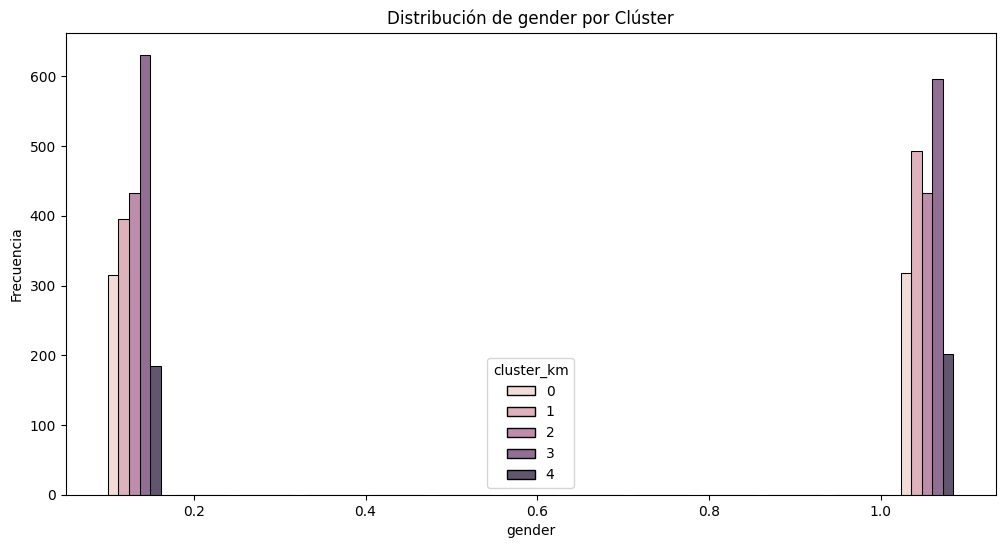

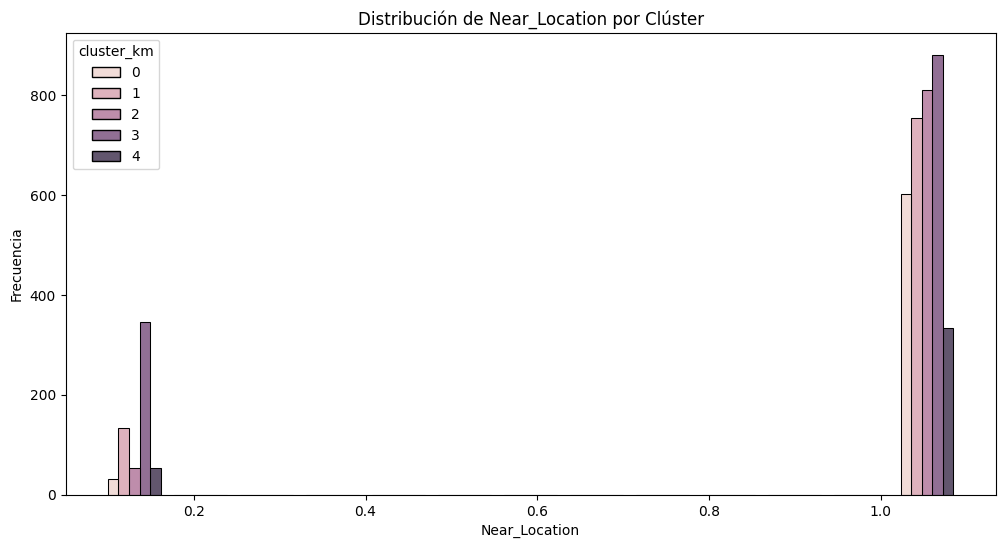

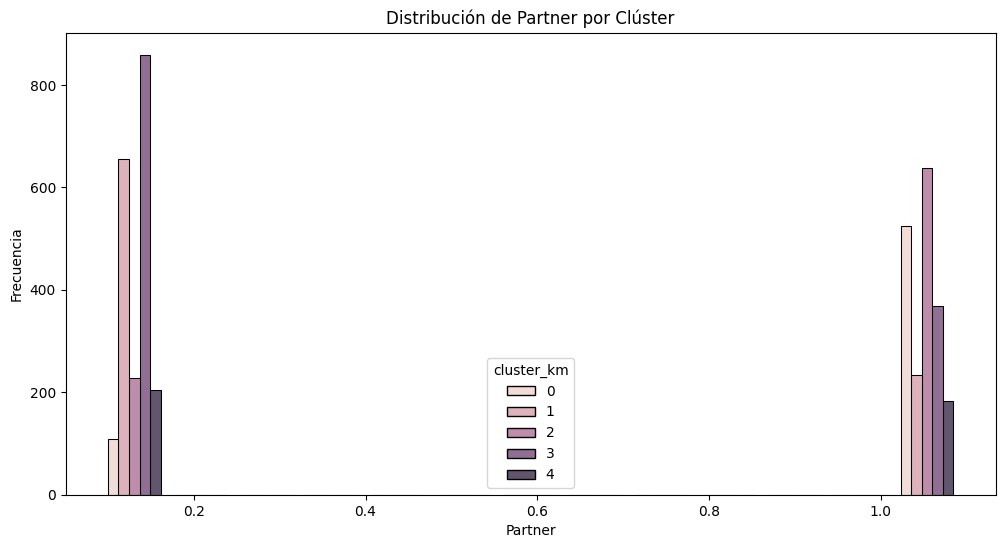

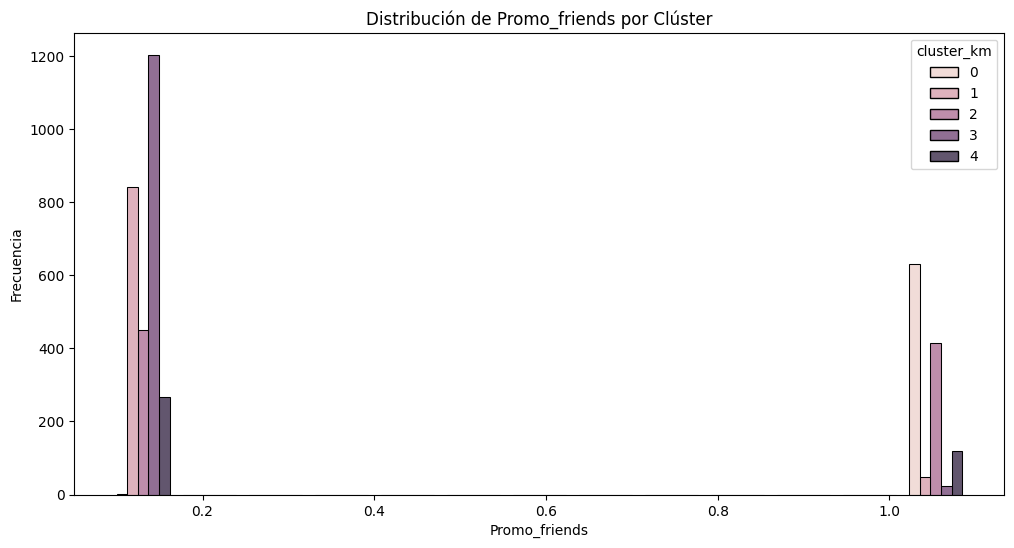

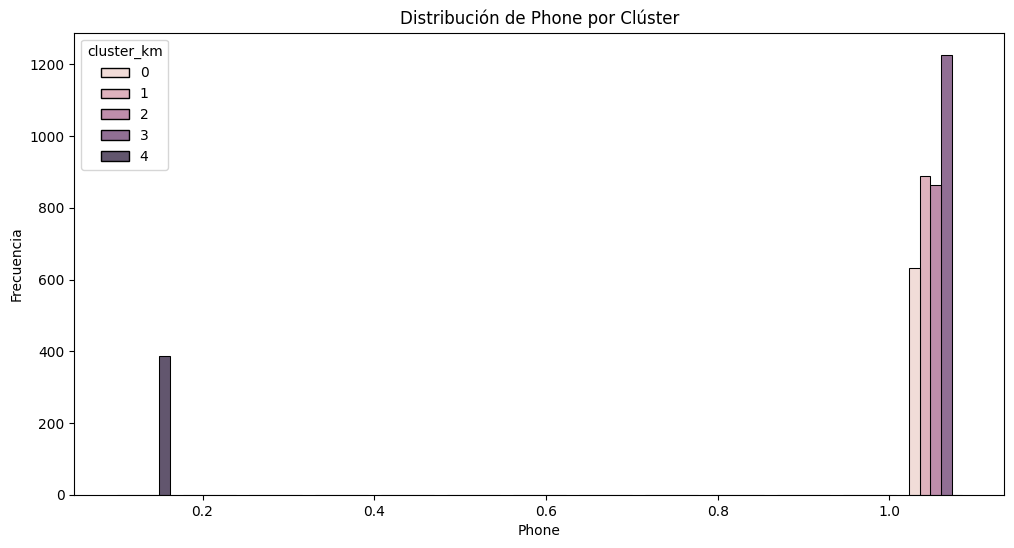

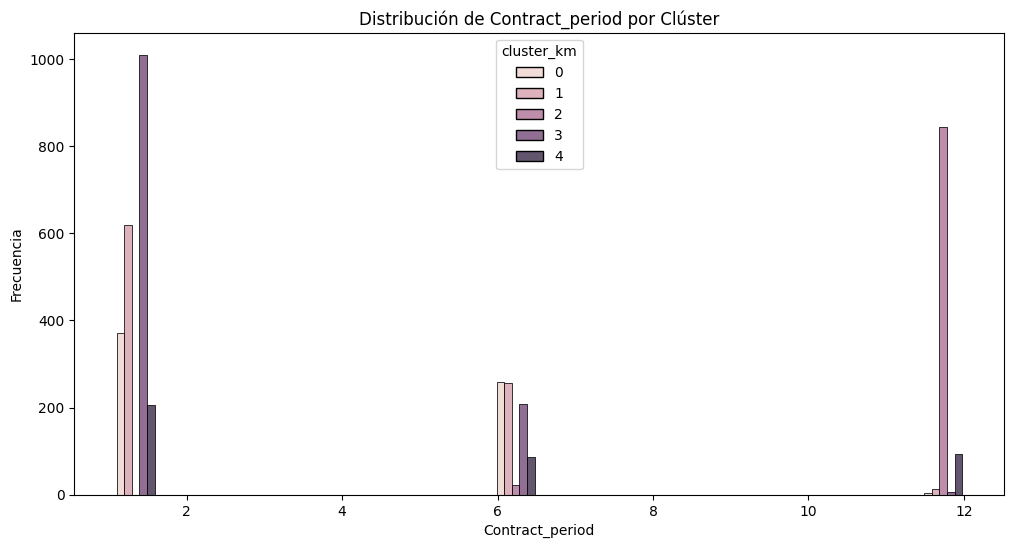

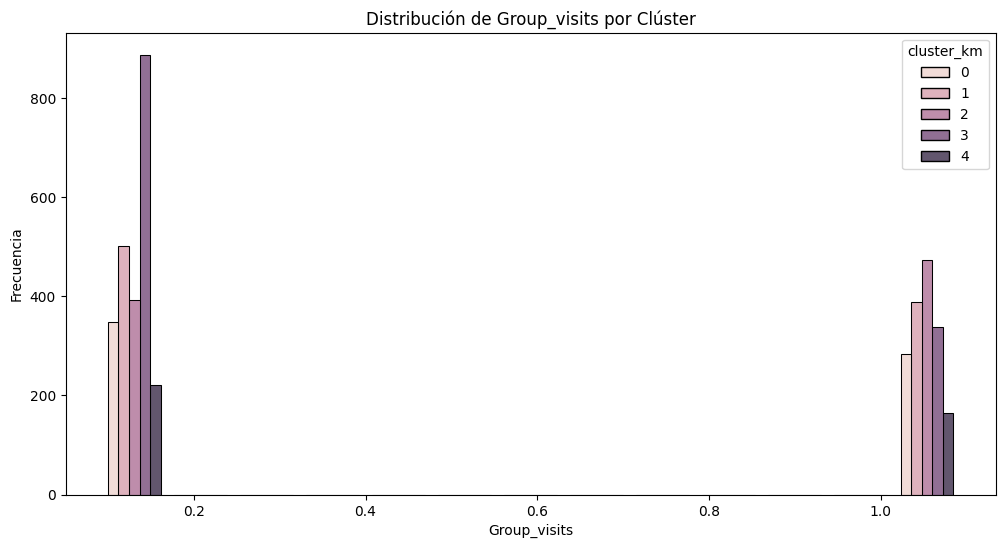

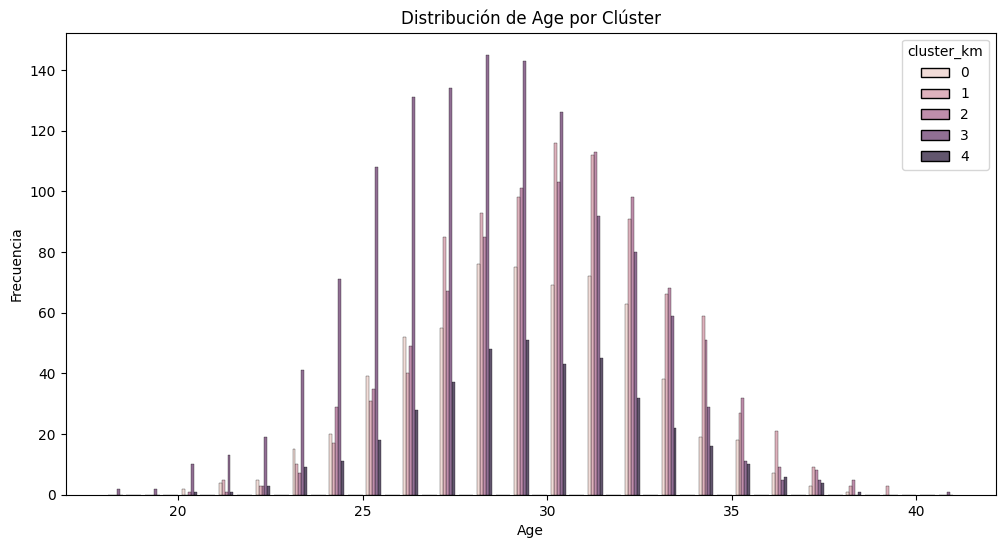

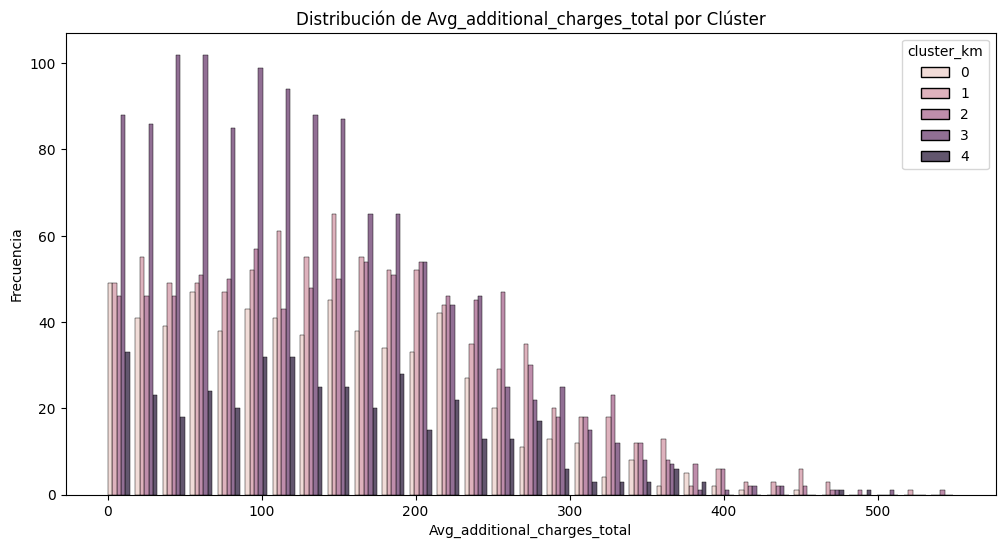

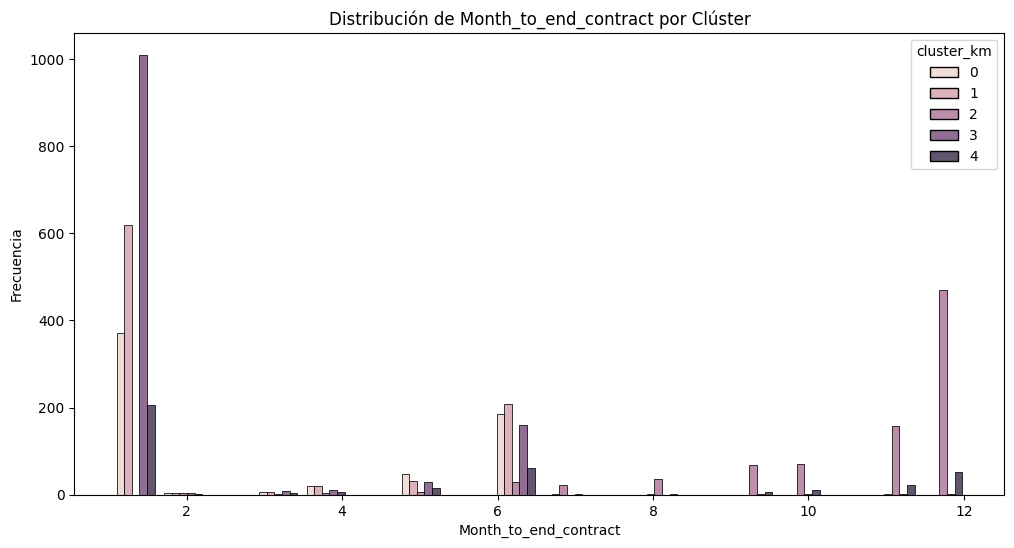

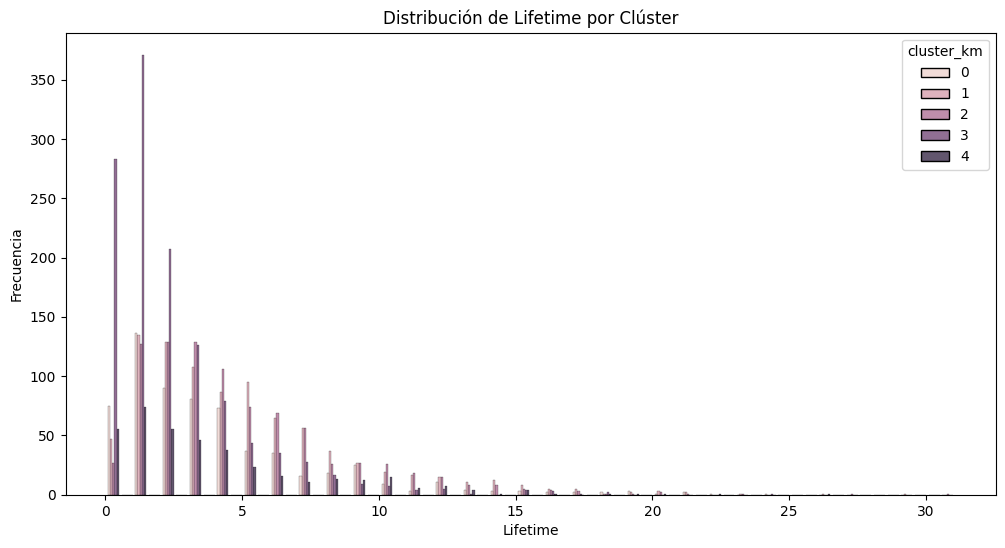

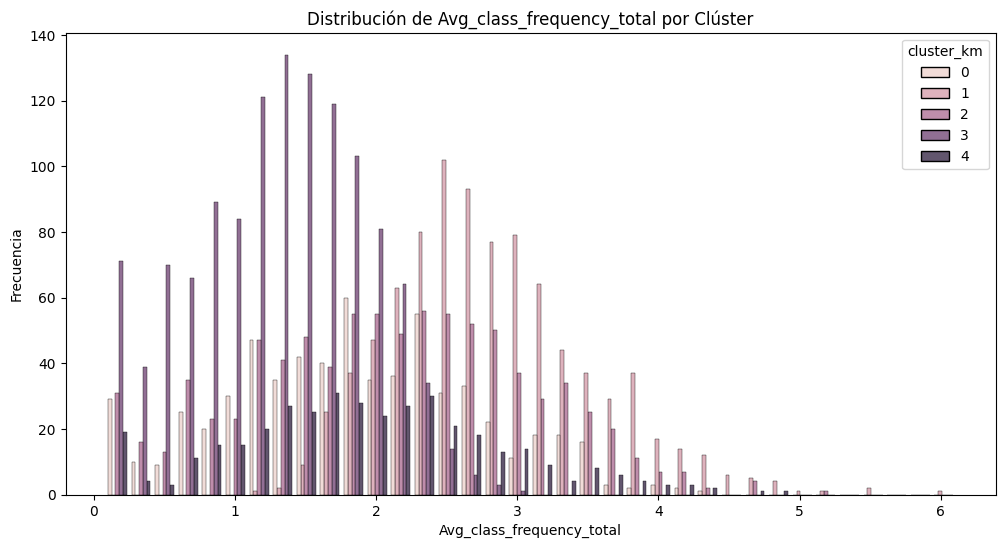

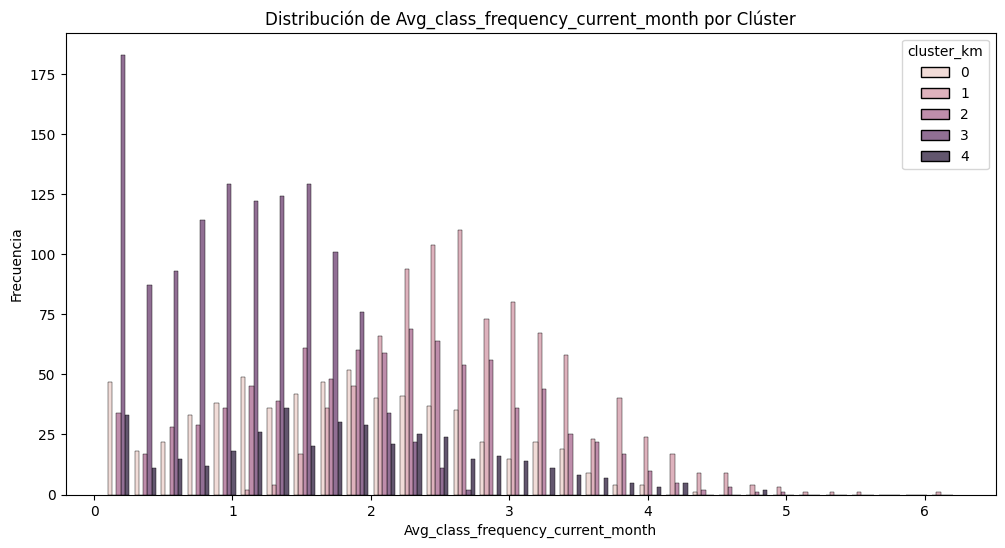

In [28]:
features_to_plot = x.columns


for feature in features_to_plot:
    #feature= features_to_plot[0]

    plt.figure(figsize=(12, 6))
    sns.histplot(data=ft, x=feature, hue='cluster_km', multiple='dodge', shrink=0.8, kde=False)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()





<div class="alert alert-block alert-success">
<b>Celda [28]</b> <a class="tocSkip"></a><br>
La visualización de la distribución de las características por clúster es un excelente método para interpretar cómo se agrupan los datos en el espacio de características. Esto ayuda a identificar patrones y características distintivas de cada clúster.
</div>


El análisis visual de la distribución de las características por clúster confirma que los grupos no tienen el mismo tamaño. La diferencia en la altura de las barras en los histogramas indica una cantidad de clientes desigual en cada segmento. Este hallazgo, en conjunto con el análisis de las medias de cada clúster, refuerza la conclusión de que los grupos se comportan de manera muy distinta entre sí. Estas variaciones demuestran que el modelo de clustering ha logrado agrupar a los clientes en segmentos con perfiles y comportamientos significativamente diferentes.

In [29]:
ft.groupby('cluster_km')['Churn'].mean()

cluster_km
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64

<div class="alert alert-block alert-warning">
<b>Celda [29]</b> <a class="tocSkip"></a><br>
Al analizar la tasa de cancelación por clúster, profundizar en las características de cada clúster puede proporcionar insights sobre por qué algunos tienen tasas de cancelación más altas. Esto podría ayudar a identificar áreas de mejora para reducir la cancelación.
</div>


El análisis de la tasa de cancelación por clúster confirma que los grupos difieren notablemente en su propensión a la fuga de clientes, lo que valida la capacidad del modelo para identificar segmentos de riesgo.

**Grupos Propensos a la Cancelación**: Los clústeres más propensos a la cancelación están compuestos por clientes más jóvenes que viven a una distancia considerable del gimnasio. Su historial muestra una baja participación en promociones por referidos y una asistencia mínima a clases grupales. Además, se caracterizan por no realizar gastos adicionales y por una frecuencia de visita inferior a una vez por semana. Un indicador crítico es que suelen cancelar su membresía aproximadamente 1.9 meses antes de que expire su contrato, lo que sugiere la necesidad de intervenciones proactivas en este período para mitigar la fuga.

**Grupos de Clientes Leales**: Por el contrario, los grupos de clientes más leales son aquellos que residen cerca del gimnasio y tienen una antigüedad superior a dos años. Estos clientes participan activamente en clases grupales, lo que demuestra un mayor compromiso. Además, muestran una mayor disposición a realizar gastos adicionales en el gimnasio. Este perfil de cliente no solo es un pilar de la base actual, sino también un indicador de éxito en las estrategias de retención.

## CONCLUSIONES

**Estrategias para expandir el público objetivo**

Con base a los datos obtenidos de los clústeres, no debemos limitar nuestro mercado por la edad o la distancia del gimnasio. En lugar de ver estos factores como un obstáculo, podemos desarrollar estrategias complementarias para atraer a más clientes.

**Para el público joven**: Implementar actividades y herramientas tecnológicas que resuenen con esta generación. Por ejemplo, se pueden ofrecer aplicaciones que permitan a los usuarios ganar puntos o recompensas al registrar su progreso en el gimnasio.

**Para clientes que viven lejos**: La motivación es clave. Se puede mantener la cercanía con ellos a través de mensajes de apoyo, imágenes inspiradoras y recordatorios de sus metas. El objetivo es que se sientan conectados con el gimnasio, sin importar la distancia.

**Fomentar el compromiso y la lealtad**

Para llegar a un público más amplio y diverso, es crucial adaptar las actividades del gimnasio y las estrategias de comunicación.

**Actividades individuales**: Es importante ofrecer opciones para quienes prefieren entrenar solos, ya que esta es una tendencia creciente.

**Uso de redes sociales**: Las plataformas digitales son una herramienta poderosa. Se puede animar a los miembros, especialmente a los más jóvenes, a compartir sus rutinas y logros en las redes sociales del gimnasio. Esto no solo genera interés, sino que también puede motivar a los clientes a invertir en servicios adicionales, como aplicaciones de entrenamiento, ropa deportiva o equipamiento.

**Aumentar la retención de clientes**

Con base en los datos de la vida de un contrato de quienes cancelan, es fundamental implementar estrategias de retención. Se deben planificar actividades especiales con anticipación al tiempo que se predice con el modelo, para mantener a los miembros motivados. Por ejemplo, se pueden organizar sorteos de membresías gratuitas, entregar premios por el progreso en los ejercicios o recompensar la asistencia frecuente.

El objetivo es mantener a los clientes comprometidos y motivados para que sigan asistiendo al gimnasio. 


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Utilizaste correctamente las funciones <code>info()</code> y <code>describe()</code> para explorar los datos.<br>
• Agrupaste los datos por la variable <code>Churn</code> para obtener insights significativos.<br>
• Visualizaste las distribuciones de las variables de manera efectiva.<br>
• Implementaste modelos de clasificación y evaluaste su rendimiento con métricas adecuadas.<br>
• Aplicaste escalado de características antes del clustering, lo cual es crucial.<br>
• Usaste dendrogramas para visualizar el clustering jerárquico.<br>
• Realizaste un análisis de correlación con un mapa de calor bien presentado.<br>
• Implementaste K-Means y visualizaste la distribución de las características por clúster.<br>
• Analizaste la tasa de cancelación por clúster, proporcionando insights valiosos.<br>
• Mantuviste un flujo de trabajo claro y estructurado a lo largo del proyecto.<br>
¡Felicidades!
</div>
